
```
Student ID: 2357572
Student Name: Suraj Kanwar
```



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Task Questions from Worksheet - 6


**Task- 1:**

Repeat all the tasks from Worksheet - 5 but try to improve the model from last week with the same dataset.
* **Use Data Augmentation to increase the number of training images.**
* **Use a deeper model with BatchNormalization and Dropout layers as presented.**
* **Understand the Model Summary and Training Behavior.**

Class Distribution in Training Set:
acai: 15 images
cupuacu: 15 images
graviola: 15 images
guarana: 15 images
pupunha: 15 images
tucuma: 15 images
Class Distribution in Test Set:
acai: 5 images
cupuacu: 5 images
graviola: 5 images
guarana: 5 images
pupunha: 5 images
tucuma: 5 images
Found 90 files belonging to 6 classes.
Found 30 files belonging to 6 classes.
Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.1382 - loss: 2.0435 - learning_rate: 1.0000e-04
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.1024 - loss: 2.0477 - learning_rate: 1.0000e-04
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.1664 - loss: 2.1111 - learning_rate: 1.0000e-04
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.2645 - loss: 1.8035 - learning_rate: 1.0000e-04
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.2645 - loss: 1.7920 - learning_rate: 1.0000e-04
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.2928 - loss: 1.6227 

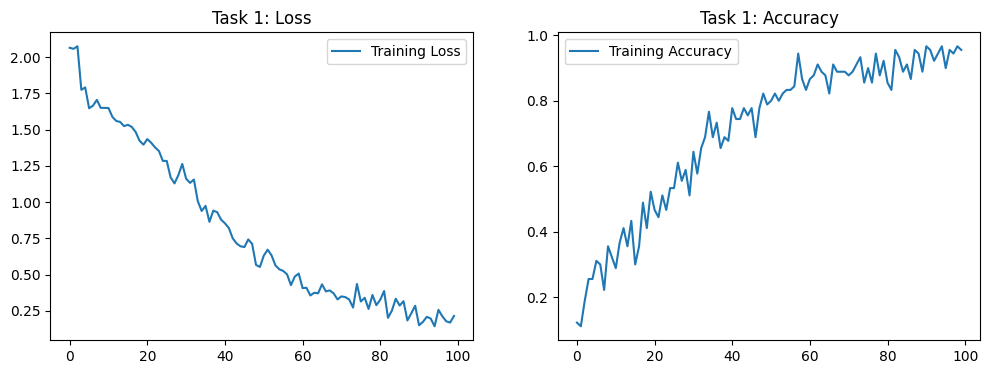

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4000 - loss: 1.3213
Task 1 Test Accuracy: 0.4000, Test Loss: 1.3213
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 947ms/step
Task 1 Classification Report:
              precision    recall  f1-score   support

        acai       1.00      0.60      0.75         5
     cupuacu       0.00      0.00      0.00         5
    graviola       0.43      0.60      0.50         5
     guarana       0.33      0.20      0.25         5
     pupunha       0.44      0.80      0.57         5
      tucuma       0.25      0.20      0.22         5

    accuracy                           0.40        30
   macro avg       0.41      0.40      0.38        30
weighted avg       0.41      0.40      0.38        30



In [5]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Constants
img_height, img_width = 224, 224
batch_size = 32
train_dir = "/content/drive/MyDrive/Artificial Intelligence and Machine Learning/Week:5/FruitinAmazon/train"
test_dir = "/content/drive/MyDrive/Artificial Intelligence and Machine Learning/Week:5/FruitinAmazon/test"
rescale = layers.Rescaling(1./255)

# Verify class distribution
class_names = sorted(os.listdir(train_dir))
print("Class Distribution in Training Set:")
for class_name in class_names:
    num_images = len(os.listdir(os.path.join(train_dir, class_name)))
    print(f"{class_name}: {num_images} images")
print("Class Distribution in Test Set:")
for class_name in class_names:
    num_images = len(os.listdir(os.path.join(test_dir, class_name)))
    print(f"{class_name}: {num_images} images")

# Stronger augmentation
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.5),  # Increased
    layers.RandomZoom(0.5),     # Increased
    layers.RandomContrast(0.5), # Increased
    layers.RandomBrightness(0.5) # Increased
])

# Load datasets (use all training data, no validation split)
train_ds = keras.utils.image_dataset_from_directory(
    train_dir, seed=123, image_size=(img_height, img_width), batch_size=batch_size
).map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=tf.data.AUTOTUNE)\
 .map(lambda x, y: (rescale(x), y), num_parallel_calls=tf.data.AUTOTUNE)\
 .cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)

test_ds = keras.utils.image_dataset_from_directory(
    test_dir, image_size=(img_height, img_width), batch_size=batch_size, shuffle=False
).map(lambda x, y: (rescale(x), y), num_parallel_calls=tf.data.AUTOTUNE)\
 .cache().prefetch(tf.data.AUTOTUNE)

# Task 1: Enhanced CNN
model = Sequential([
    layers.Input(shape=(224, 224, 3)),
    Conv2D(32, (3, 3), padding='same', activation='relu'),  # Increased filters
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(64, (3, 3), padding='same', activation='relu'),  # Increased filters
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(128, (3, 3), padding='same', activation='relu'), # Added layer
    MaxPooling2D((2, 2)),
    Dropout(0.4),                                           # Increased dropout
    Flatten(),
    Dense(128, activation='relu'),                          # Increased capacity
    Dropout(0.5),
    Dense(6, activation='softmax')
])

lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.5, patience=10, min_lr=1e-6)  # Monitor training loss
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, epochs=100,
                    callbacks=[keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True, monitor='loss'),
                               lr_scheduler])

# Plot Task 1 training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Task 1: Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Task 1: Accuracy')
plt.legend()
plt.show()

# Evaluate Task 1
test_loss, test_acc = model.evaluate(test_ds)
print(f"Task 1 Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# Task 1 Inference
y_true, y_pred = [], []
for images, labels in test_ds:
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(model.predict(images), axis=1))
print("Task 1 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

**Task - 2:**

* **Implement transfer learning using a pre-trained model trained on ImageNet weights, freeze the layers of the model, and fit it only on the output layer to classify the fruits dataset.**
* **Evaluate the model’s performance and generate an inference output and classification report.**
* **Did the performance improve compared to training from scratch?**

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 95s 30s/step - accuracy: 0.2122 - loss: 2.0896 - learning_rate: 5.0000e-05
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 93s 33s/step - accuracy: 0.2066 - loss: 2.0297 - learning_rate: 5.0000e-05
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 91s 29s/step - accuracy: 0.2660 - loss: 1.8259 - learning_rate: 5.0000e-05
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 92s 30s/step - accuracy: 0.2483 - loss: 1.8194 - learning_rate: 5.0000e-05
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 91s 32s/step - accuracy: 0.2622 - loss: 1.7419 - learning_rate: 5.0000e-05
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 91s 32s/step - accuracy: 0.3270 - loss: 1.5369 - learning_rate: 5.0000e-05
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 142s 30s/step - accuracy: 0.4659 - loss: 1.4962 - learning_rate: 5.0000e-05
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 91s 30s/step - accuracy: 0.4136 - loss: 1.3626 - learning_rate: 5.0000e-05
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 91s 29s/step - accuracy: 0.5847 - loss: 1.2301 - learning_rate: 5.0000e-05


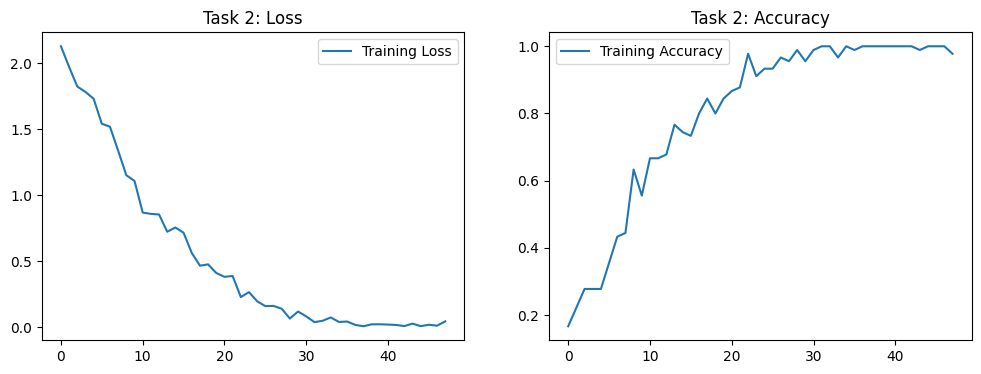

1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.6000 - loss: 2.0110
Task 2 VGG16 Test Accuracy: 0.6000, Test Loss: 2.0110
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
Task 2 Classification Report:
              precision    recall  f1-score   support

        acai       0.50      0.60      0.55         5
     cupuacu       0.50      0.60      0.55         5
    graviola       0.67      0.80      0.73         5
     guarana       0.60      0.60      0.60         5
     pupunha       0.67      0.40      0.50         5
      tucuma       0.75      0.60      0.67         5

    accuracy                           0.60        30
   macro avg       0.61      0.60      0.60        30
weighted avg       0.61      0.60      0.60        30

Performance Comparison:
Task 1 CNN - Test Accuracy: 0.4000
Task 2 VGG16 - Task Accuracy: 0.6000


In [6]:
# Task 2: Enhanced VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers[:-8]:  # Unfreeze last 8 layers
    layer.trainable = False
for layer in base_model.layers[-8:]:
    layer.trainable = True

model_vgg = Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    Dense(256, activation='relu'),  # Increased capacity
    Dropout(0.7),                   # Increased dropout
    Dense(6, activation='softmax')
])

lr_scheduler_vgg = keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, min_lr=1e-6)
model_vgg.compile(optimizer=Adam(learning_rate=0.00005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_vgg = model_vgg.fit(train_ds, epochs=50,
                            callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor='loss'),
                                       lr_scheduler_vgg])

# Plot Task 2 training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['loss'], label='Training Loss')
plt.title('Task 2: Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_vgg.history['accuracy'], label='Training Accuracy')
plt.title('Task 2: Accuracy')
plt.legend()
plt.show()

# Evaluate Task 2
test_loss_vgg, test_acc_vgg = model_vgg.evaluate(test_ds)
print(f"Task 2 VGG16 Test Accuracy: {test_acc_vgg:.4f}, Test Loss: {test_loss_vgg:.4f}")

# Task 2 Inference
y_true_vgg, y_pred_vgg = [], []
for images, labels in test_ds:
    y_true_vgg.extend(labels.numpy())
    y_pred_vgg.extend(np.argmax(model_vgg.predict(images), axis=1))
print("Task 2 Classification Report:")
print(classification_report(y_true_vgg, y_pred_vgg, target_names=class_names))

# Comparison
print("Performance Comparison:")
print(f"Task 1 CNN - Test Accuracy: {test_acc:.4f}")
print(f"Task 2 VGG16 - Task Accuracy: {test_acc_vgg:.4f}")